**LOAD THE LIBRARIES**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


**CONNECT TO GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**READ THE DATA**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/capstone project dataset/nasa nearestobject.csv")
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
df.shape

(90836, 10)

In [ ]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


**STATS FOR EACH COLUMNS**

In [ ]:

df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


**CHECK FOR NULL VALUE**

In [ ]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

**CHECK FOR DUPLICATION**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


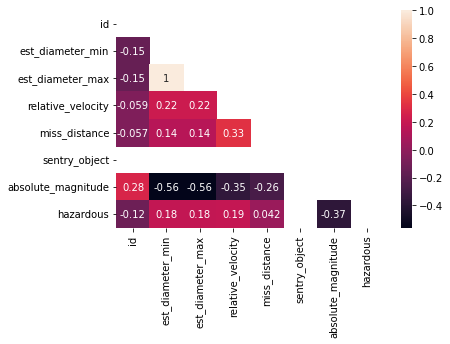

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask = mask ,annot=True)

In [ ]:
df=df.drop(['orbiting_body','sentry_object'],axis=1)
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [ ]:
p=df['hazardous'].value_counts()
p

False    81996
True      8840
Name: hazardous, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 4.9+ MB


In [ ]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [ ]:
fig = px.pie(p, values = "hazardous", names = ["Not Hazardous", "Hazardous"], hole = 0.35, opacity = 0.90,
            labels = {"label" :"hazardous"})
fig.update_layout(title = dict(text = "Pie Chart of Hazardous"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

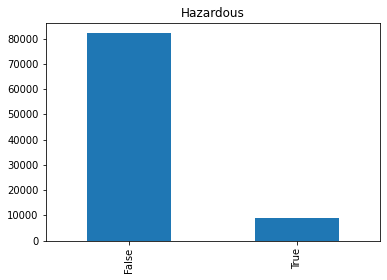

In [ ]:
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

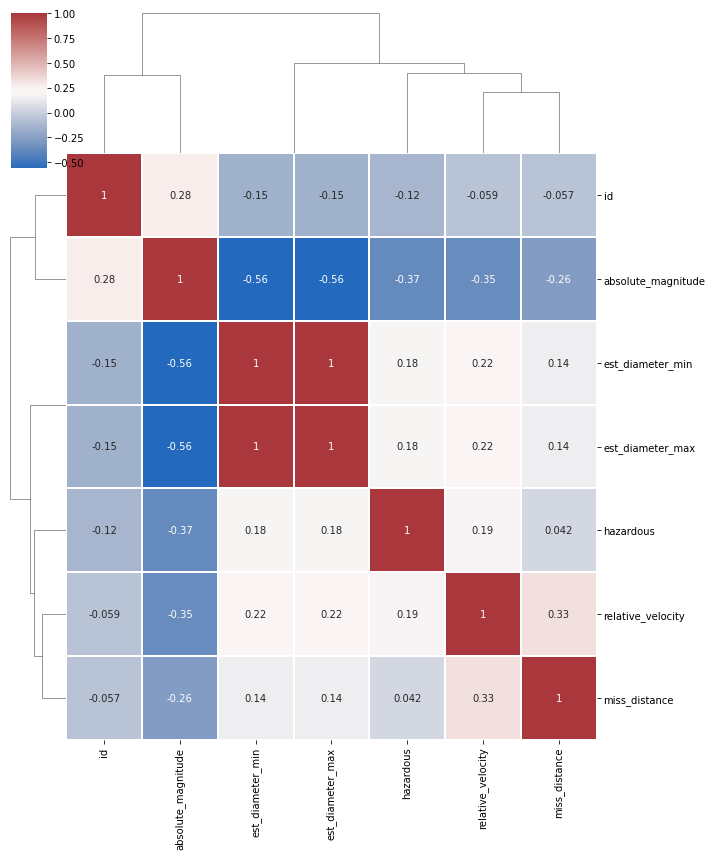

In [ ]:
sns.clustermap(df.corr(),cmap="vlag",dendrogram_ratio=(0.1,0.2),\
              annot = True, linewidths = 1, figsize=(10,12))
plt.show();

In [ ]:
num_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[num_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


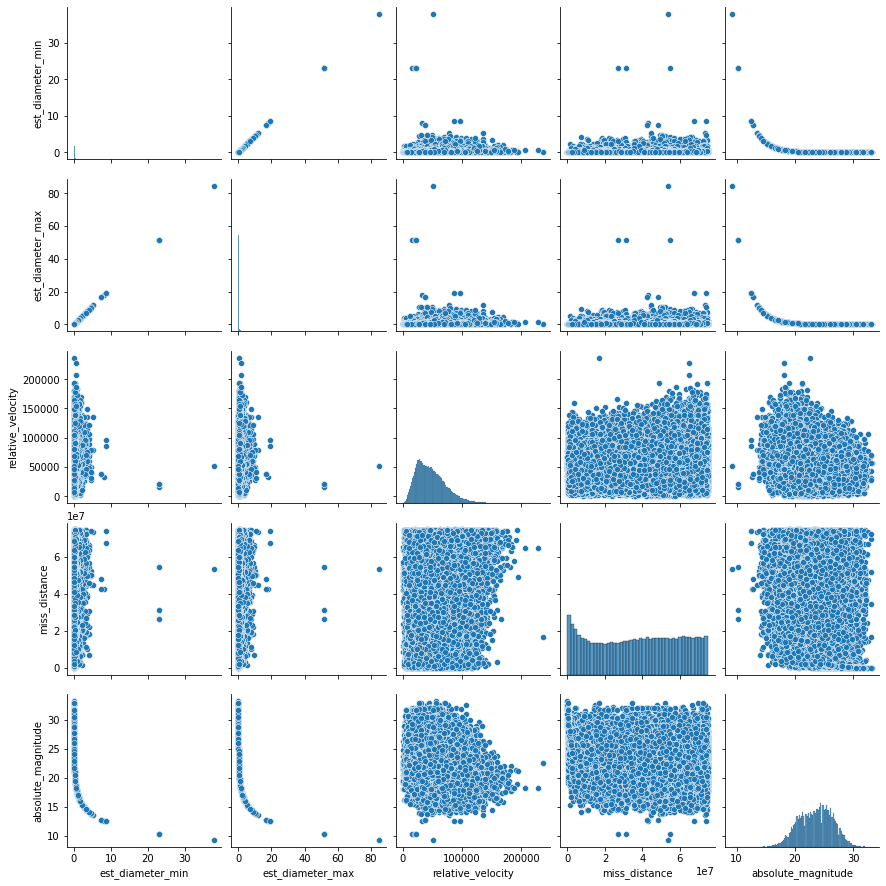

In [ ]:
fig= sns.pairplot(df[num_df])

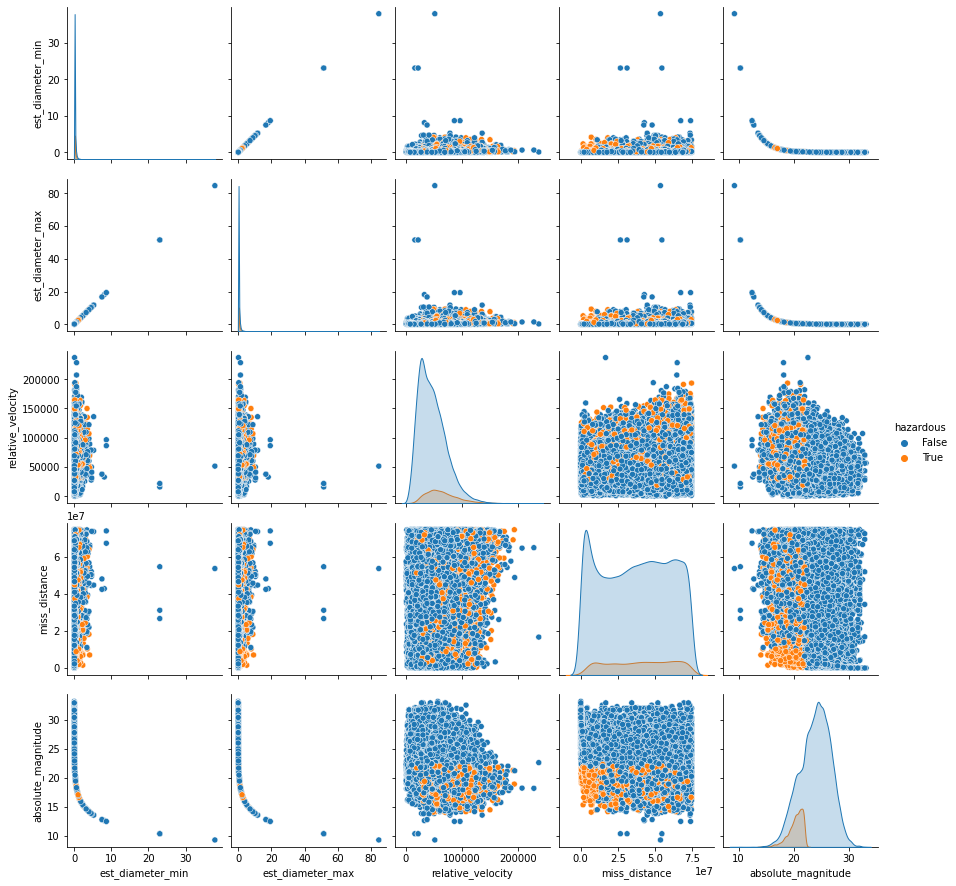

In [ ]:
fig= sns.pairplot(df[num_df+['hazardous']],hue = 'hazardous')

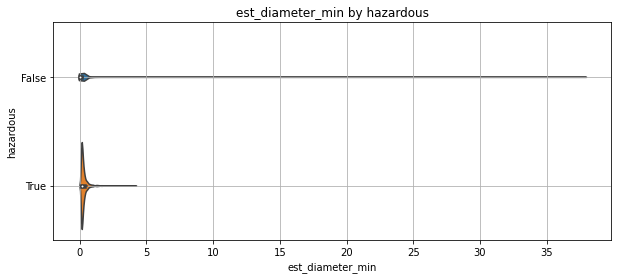

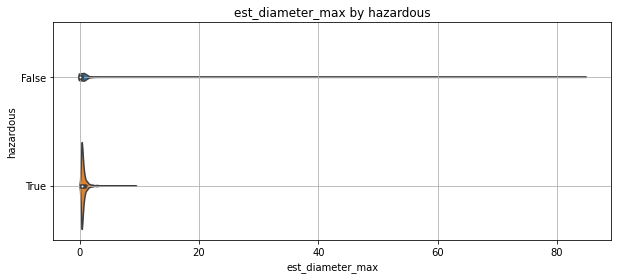

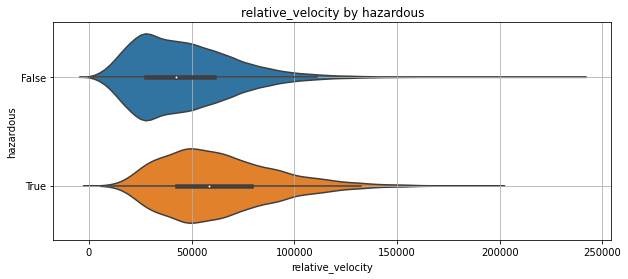

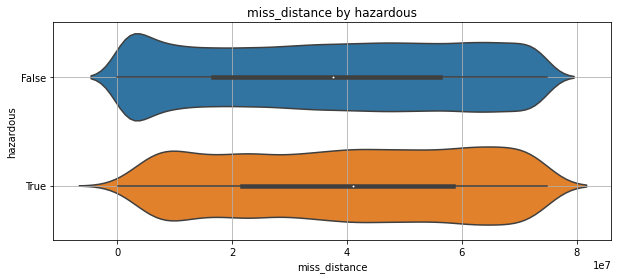

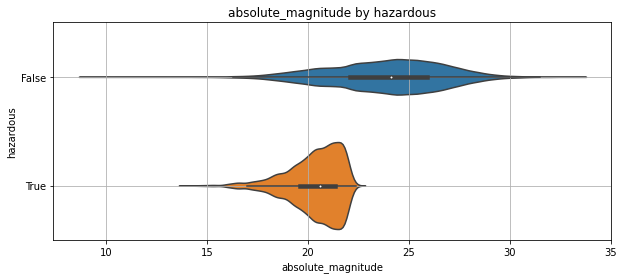

In [ ]:
for k in num_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

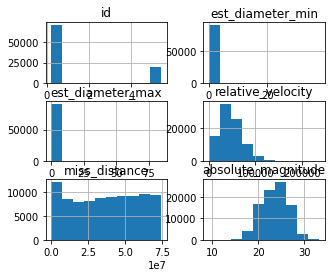

In [ ]:

df.hist(bins=10,figsize=(5, 4))
plt.show()



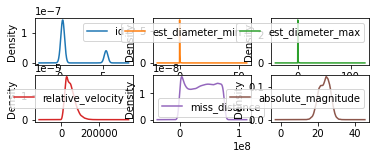

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

In [ ]:
x = df.drop(["id","name",'est_diameter_max',"est_diameter_max",'hazardous',"miss_distance","absolute_magnitude"] , axis = 1)


In [ ]:
y = df.hazardous.astype("int")
print(x.shape, y.shape)

(90836, 2) (90836,)


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

**USING RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

In [ ]:

model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pre=model.predict(X_test)

In [ ]:
accuracy_score(y_test,pre)

0.8949251431087627

In [ ]:
con=confusion_matrix(y_test,pre)
con

array([[15592,   781],
       [ 1128,   667]])

In [ ]:
print((classification_report(y_test,pre)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     16373
           1       0.46      0.37      0.41      1795

    accuracy                           0.89     18168
   macro avg       0.70      0.66      0.68     18168
weighted avg       0.89      0.89      0.89     18168



**USING DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2= DecisionTreeClassifier()

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pre2=model2.predict(X_test)

In [ ]:
accuracy_score(y_test,pre2)

0.8900814619110524

In [ ]:
con=confusion_matrix(y_test,pre2)
con

array([[15386,   987],
       [ 1010,   785]])

In [ ]:
print((classification_report(y_test,pre2)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16373
           1       0.44      0.44      0.44      1795

    accuracy                           0.89     18168
   macro avg       0.69      0.69      0.69     18168
weighted avg       0.89      0.89      0.89     18168

